<a href="https://colab.research.google.com/github/Atharinia/INSE-6320_-Risk/blob/main/Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd

df = pd.read_csv('/content/Health_Risk_Data__2024_Monthly_.csv')

tehran_population = 9_000_000

df['P(Mortality)'] = df['Mortality Rate Due to Respiratory Issues (%)'] / 100

print(df[['Month', 'Mortality Rate Due to Respiratory Issues (%)', 'P(Mortality)']])



      Month  Mortality Rate Due to Respiratory Issues (%)  P(Mortality)
0   2024-01                                          0.54        0.0054
1   2024-02                                          1.00        0.0100
2   2024-03                                          2.28        0.0228
3   2024-04                                          2.48        0.0248
4   2024-05                                          2.01        0.0201
5   2024-06                                          2.82        0.0282
6   2024-07                                          2.13        0.0213
7   2024-08                                          2.79        0.0279
8   2024-09                                          2.63        0.0263
9   2024-10                                          1.62        0.0162
10  2024-11                                          0.74        0.0074
11  2024-12                                          1.43        0.0143


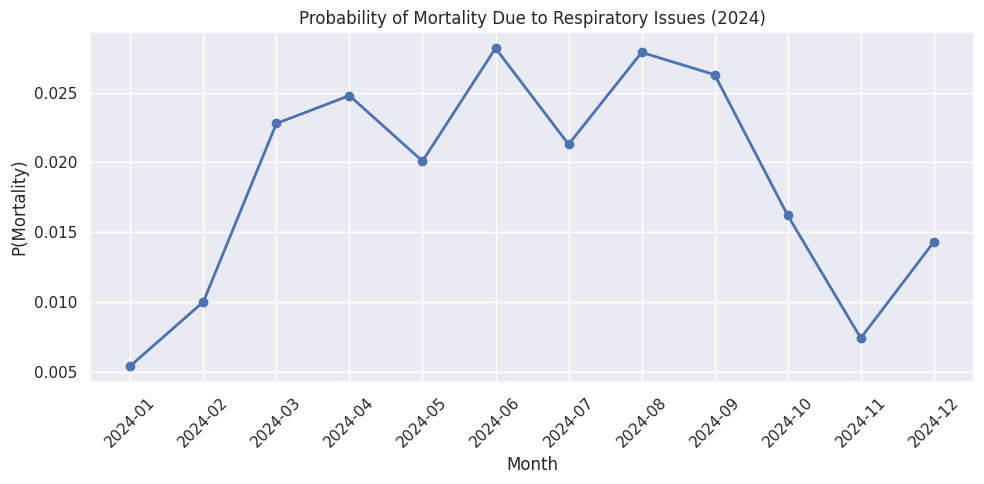

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "Health_Risk_Data__2024_Monthly_.csv"
df = pd.read_csv(file_path)

# Convert percentage to probability
df['P(Mortality)'] = df['Mortality Rate Due to Respiratory Issues (%)'] / 100

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['P(Mortality)'], marker='o', linewidth=2)

# Labels and title
plt.title('Probability of Mortality Due to Respiratory Issues (2024)')
plt.xlabel('Month')
plt.ylabel('P(Mortality)')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [64]:
# Load the CSV file
df = pd.read_csv("Environmental_Risk_Data__2024_Monthly_.csv")

# Calculate environmental risk probability
df["Risk_AQI"] = (df["Air Quality Index (AQI)"] > 150).astype(int)
df["Risk_NDVI"] = (df["Vegetation Index (NDVI)"] < 0.3).astype(int)
df["Risk_AcidRain"] = (df["Acid Rain Incidents (Yes=1, No=0)"] == 1).astype(int)
df["Risk_Soil"] = (df["Soil Degradation Level (%)"] > 30).astype(int)
df["Risk_Water"] = (df["Water Contamination (mg/L of pollutants)"] > 2).astype(int)
df["Risk_Smog"] = (df["Number of Smog Days per Month"] > 7).astype(int)

# Calculate and round the environmental risk probability
df["Risk Factors Occurring"] = df[[
    "Risk_AQI", "Risk_NDVI", "Risk_AcidRain", "Risk_Soil", "Risk_Water", "Risk_Smog"
]].sum(axis=1)

# Calculate probability of Environmental Risk (out of 6)
df["P(Environmental Risk)"] = (df["Risk Factors Occurring"] / 6).round(2)

# Show only the Month and calculated probability
print(df[["Month", "Risk Factors Occurring", "P(Environmental Risk)"]])



      Month  Risk Factors Occurring  P(Environmental Risk)
0   2024-01                       1                   0.17
1   2024-02                       2                   0.33
2   2024-03                       1                   0.17
3   2024-04                       2                   0.33
4   2024-05                       4                   0.67
5   2024-06                       2                   0.33
6   2024-07                       2                   0.33
7   2024-08                       1                   0.17
8   2024-09                       3                   0.50
9   2024-10                       3                   0.50
10  2024-11                       2                   0.33
11  2024-12                       3                   0.50


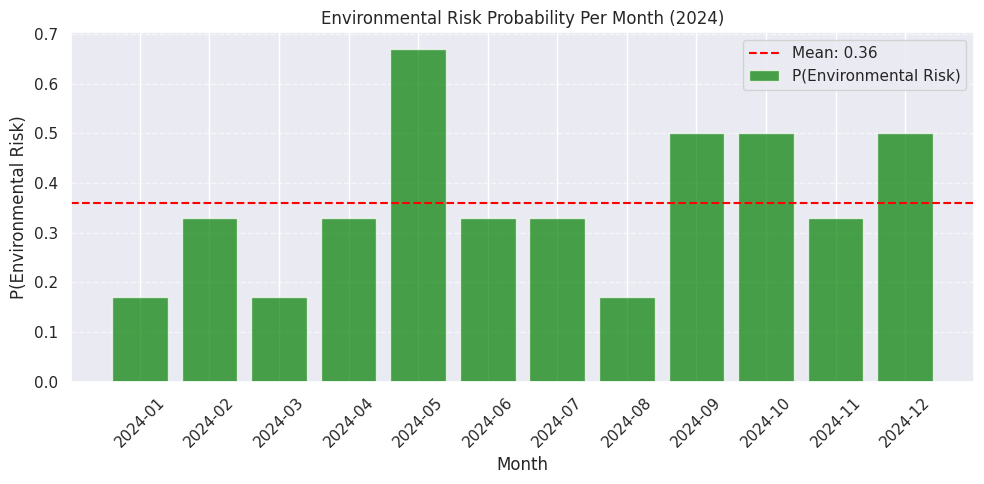

In [65]:
# Calculate the mean
mean_risk = df["P(Environmental Risk)"].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(df["Month"], df["P(Environmental Risk)"], color='green', alpha=0.7, label="P(Environmental Risk)")

# Add mean line
plt.axhline(y=mean_risk, color='red', linestyle='--', label=f'Mean: {mean_risk:.2f}')

# Customize plot
plt.xlabel("Month")
plt.ylabel("P(Environmental Risk)")
plt.title("Environmental Risk Probability Per Month (2024)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()



In [77]:
# Show final table
df = pd.read_csv("new Economic_Risk_Data__Winter-Summer_.csv")
print(df[[
    "Month",
    "Risk Factors Occurring",
    "P (Economic Risk)"
]])

      Month  Risk Factors Occurring  P (Economic Risk)
0   2024-01                       4                0.8
1   2024-02                       5                1.0
2   2024-03                       4                0.8
3   2024-04                       3                0.6
4   2024-05                       4                0.8
5   2024-06                       2                0.4
6   2024-07                       2                0.4
7   2024-08                       2                0.4
8   2024-09                       3                0.6
9   2024-10                       4                0.8
10  2024-11                       3                0.6
11  2024-12                       4                0.8


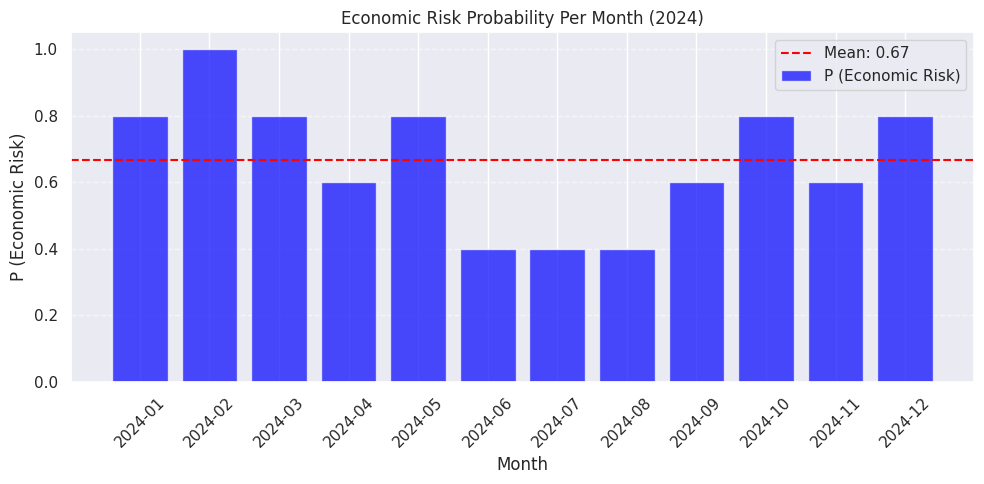

In [80]:
# Calculate the mean
mean_risk = df["P (Economic Risk)"].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(df["Month"], df["P (Economic Risk)"], color='blue', alpha=0.7, label="P (Economic Risk)")

# Add mean line
plt.axhline(y=mean_risk, color='red', linestyle='--', label=f'Mean: {mean_risk:.2f}')

# Customize plot
plt.xlabel("Month")
plt.ylabel("P (Economic Risk)")
plt.title("Economic Risk Probability Per Month (2024)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [85]:
import pandas as pd

# Load your social risk data
df = pd.read_csv("Social_Risk_Data__2024_Monthly_.csv")

# Define fixed thresholds (from your image)
thresholds = {
    "Public Complaints About Air Pollution": 1000,
    "Protests Related to Pollution": 3,
    "Government Policies Implemented (Yes=1, No=0)": 0,
    "Public Perception of Air Quality (%)": 40,
    "Mental Health Cases Linked to Pollution": 300
}

# Apply risk conditions
df["Risk_Complaints"] = (df["Public Complaints About Air Pollution"] > thresholds["Public Complaints About Air Pollution"]).astype(int)
df["Risk_Protests"] = (df["Protests Related to Pollution"] > thresholds["Protests Related to Pollution"]).astype(int)
df["Risk_NoPolicy"] = (df["Government Policies Implemented (Yes=1, No=0)"] == 0).astype(int)
df["Risk_Perception"] = (df["Public Perception of Air Quality (%)"] < thresholds["Public Perception of Air Quality (%)"]).astype(int)
df["Risk_MentalHealth"] = (df["Mental Health Cases Linked to Pollution"] > thresholds["Mental Health Cases Linked to Pollution"]).astype(int)

# Calculate total risk factors and probability
df["Risk Factors Occurring"] = df[[
    "Risk_Complaints", "Risk_Protests", "Risk_NoPolicy", "Risk_Perception", "Risk_MentalHealth"
]].sum(axis=1)

df["P(Social Risk)"] = (df["Risk Factors Occurring"] / 5).round(2)

# Show the final result
print(df[[
    "Month",
    "Risk Factors Occurring",
    "P(Social Risk)"
]])


      Month  Risk Factors Occurring  P(Social Risk)
0   2024-01                       2             0.4
1   2024-02                       3             0.6
2   2024-03                       1             0.2
3   2024-04                       1             0.2
4   2024-05                       3             0.6
5   2024-06                       0             0.0
6   2024-07                       0             0.0
7   2024-08                       4             0.8
8   2024-09                       2             0.4
9   2024-10                       1             0.2
10  2024-11                       4             0.8
11  2024-12                       3             0.6


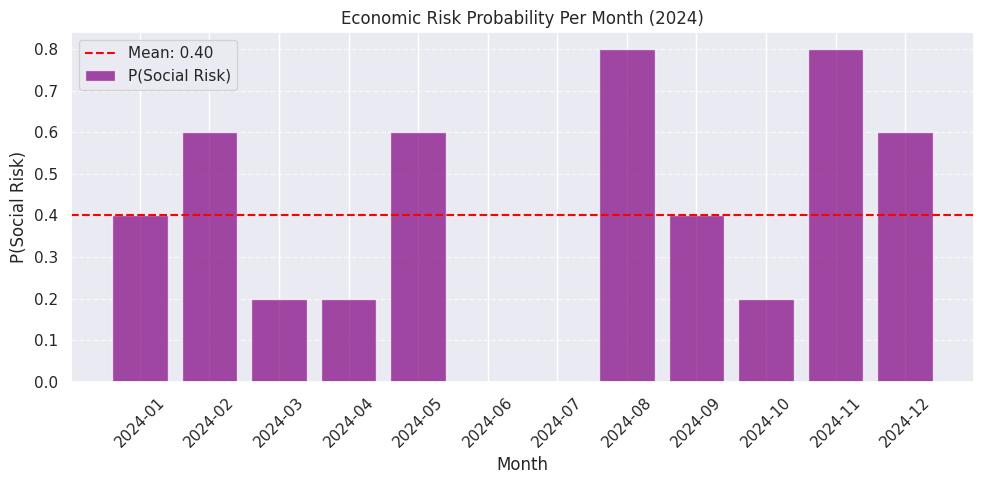

In [86]:
# Calculate the mean
mean_risk = df["P(Social Risk)"].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(df["Month"], df["P(Social Risk)"], color='purple', alpha=0.7, label="P(Social Risk)")

# Add mean line
plt.axhline(y=mean_risk, color='red', linestyle='--', label=f'Mean: {mean_risk:.2f}')

# Customize plot
plt.xlabel("Month")
plt.ylabel("P(Social Risk)")
plt.title("Economic Risk Probability Per Month (2024)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [87]:
pip install graphviz

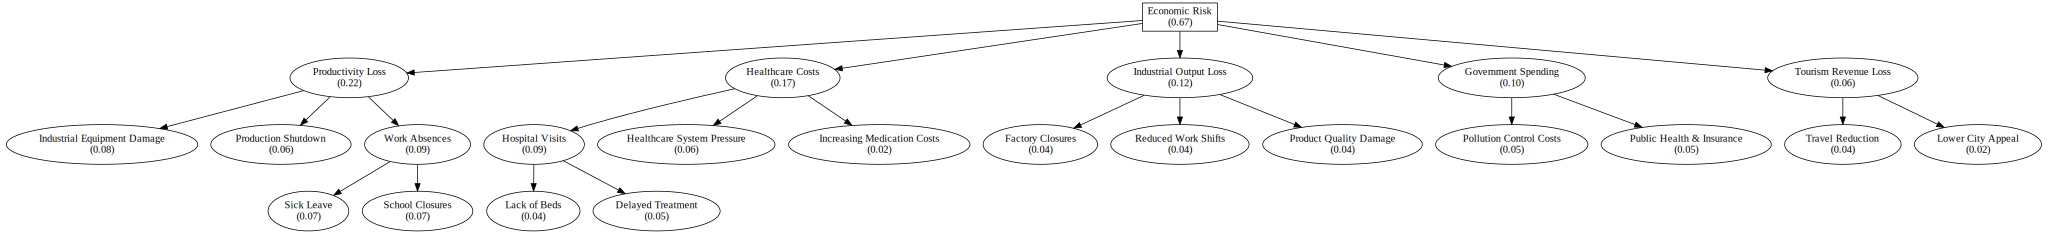

In [89]:
from graphviz import Digraph

# ایجاد درخت Fault Tree
dot = Digraph(comment='Economic Risk Fault Tree')

# گره اصلی
dot.node('ER', 'Economic Risk\n(0.67)', shape='box')

# سطح اول
dot.node('PL', 'Productivity Loss\n(0.22)')
dot.node('HC', 'Healthcare Costs\n(0.17)')
dot.node('IOL', 'Industrial Output Loss\n(0.12)')
dot.node('GS', 'Government Spending\n(0.10)')
dot.node('TRL', 'Tourism Revenue Loss\n(0.06)')
dot.edges([('ER', 'PL'), ('ER', 'HC'), ('ER', 'IOL'), ('ER', 'GS'), ('ER', 'TRL')])

# Productivity Loss children
dot.node('IED', 'Industrial Equipment Damage\n(0.08)')
dot.node('PS', 'Production Shutdown\n(0.06)')
dot.node('WA', 'Work Absences\n(0.09)')
dot.edges([('PL', 'IED'), ('PL', 'PS'), ('PL', 'WA')])
dot.node('SL', 'Sick Leave\n(0.07)')
dot.node('SC', 'School Closures\n(0.07)')
dot.edges([('WA', 'SL'), ('WA', 'SC')])

# Healthcare Costs children
dot.node('HV', 'Hospital Visits\n(0.09)')
dot.node('HSP', 'Healthcare System Pressure\n(0.06)')
dot.node('IMC', 'Increasing Medication Costs\n(0.02)')
dot.edges([('HC', 'HV'), ('HC', 'HSP'), ('HC', 'IMC')])
dot.node('LOB', 'Lack of Beds\n(0.04)')
dot.node('DT', 'Delayed Treatment\n(0.05)')
dot.edges([('HV', 'LOB'), ('HV', 'DT')])

# Industrial Output Loss children
dot.node('FC', 'Factory Closures\n(0.04)')
dot.node('RWS', 'Reduced Work Shifts\n(0.04)')
dot.node('PQD', 'Product Quality Damage\n(0.04)')
dot.edges([('IOL', 'FC'), ('IOL', 'RWS'), ('IOL', 'PQD')])

# Government Spending children
dot.node('PCC', 'Pollution Control Costs\n(0.05)')
dot.node('PHI', 'Public Health & Insurance\n(0.05)')
dot.edges([('GS', 'PCC'), ('GS', 'PHI')])

# Tourism Revenue Loss children
dot.node('TR', 'Travel Reduction\n(0.04)')
dot.node('LCA', 'Lower City Appeal\n(0.02)')
dot.edges([('TRL', 'TR'), ('TRL', 'LCA')])

# نمایش مستقیم در محیط Jupyter یا پایتون
dot.view()  # فقط باز می‌کنه اگر امکان‌پذیر باشه
dot  # این خط باعث میشه در محیط‌های مثل Jupyter مستقیم نمایش داده بشه
